In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
_DPI = 120

_LINES_ALPHA = .2
_HORIZON_LINE_ALPHA = .4

_LINES_WIDTH = .1
_HORIZON_LINE_WIDTH = .2

_LINES_COLOR = 'black'
_HORIZON_LINE_COLOR = 'red'

_PAPER_DIMENSIONS_MAP = {
    'A1': (59.4, 84.1), 
    'A2': (42, 49.4),
    'A3': (29.7, 42),
    'A4': (21, 29.7)
}

def paper_dimensions(d):
    if type(d) is str:
        d = d.upper()
    if d in _PAPER_DIMENSIONS_MAP:
        return _PAPER_DIMENSIONS_MAP[d]
    return d

def cm2inch(values):
    return list(map(lambda v: v / 2.54, values))

def prepare_plot(page_dimensions_cm):
    width, height = cm2inch(page_dimensions_cm)
    
    fig, ax = plt.subplots(figsize=(width, height), dpi=_DPI)
    
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)

    ax.xaxis.set_visible(False)  # Hide X-axis
    ax.yaxis.set_visible(False)  # Hide Y-axis
    
    return ax, (width, height)

def draw_vanish_points(vanish_points, page_dimensions, num_lines, ax):    
    r = np.linalg.norm(page_dimensions)
    
    for x0, y0 in vanish_points:
        for alpha in np.linspace(0, 1, num_lines, endpoint=False):
            x = r * np.cos(alpha * 2 * np.pi) + x0
            y = r * np.sin(alpha * 2 * np.pi) + y0
            
            ax.plot([x0, x], [y0, y], 
                    color=_LINES_COLOR, 
                    alpha=_LINES_ALPHA, 
                    linewidth=_LINES_WIDTH) 

def draw_horizon_line(pos, deg, page_dimensions, ax):
    x0, y0 = pos
    r = np.linalg.norm(page_dimensions)
    
    for theta in [deg, deg + 180]:
        x = r * np.cos(np.deg2rad(theta)) + x0
        y = r * np.sin(np.deg2rad(theta)) + y0
    
        ax.plot([x0, x], [y0, y], 
                color=_HORIZON_LINE_COLOR, 
                alpha=_HORIZON_LINE_ALPHA, 
                linewidth=_HORIZON_LINE_WIDTH, 
                zorder=-10)
        
def save_pdf(output_file):
    plt.savefig(f'{output_file}.pdf', format='pdf', dpi=_DPI, bbox_inches='tight')

In [4]:
def one_vanish_point(vp_cm, page_dimensions_cm, output_file, num_lines=30, horizon_line='h'):
    if horizon_line == 'h':
        horizon_line = 0
    elif horizon_line == 'v':
        horizon_line = 90
    elif type(horizon_line) not in (int, float):
        raise Exception(
            f'Invalid horizon line ({type(horizon_line)} -> {horizon_line})')
    
    ax, page_dimensions_inch = prepare_plot(paper_dimensions(page_dimensions_cm))
    
    draw_vanish_points([cm2inch(vp_cm)], page_dimensions_inch, num_lines, ax)
    draw_horizon_line(cm2inch(vp_cm), horizon_line, page_dimensions_inch, ax)
    
    save_pdf(output_file)
    
def two_vanish_point(vpA_cm, vpB_cm, page_dimensions_cm, output_file, num_lines=30):
    ax, page_dimensions_inch = prepare_plot(paper_dimensions(page_dimensions_cm))
    
    draw_vanish_points([cm2inch(vpA_cm), cm2inch(vpB_cm)], page_dimensions_inch, num_lines, ax)
    
    vec_x = vpA_cm[0] - vpB_cm[0]
    vec_y = vpA_cm[1] - vpB_cm[1]
    hip = np.linalg.norm((vec_x, vec_y))
    
    horizon_line = np.rad2deg(np.arccos(vec_x / hip))
    
    draw_horizon_line(cm2inch(vpA_cm), horizon_line, page_dimensions_inch, ax)
    
    save_pdf(output_file)
    
def three_vanish_point(vpA_cm, vpB_cm, vpC_cm, page_dimensions_cm, output_file, num_lines=30):
    ax, page_dimensions_inch = prepare_plot(paper_dimensions(page_dimensions_cm))
    
    draw_vanish_points([cm2inch(vpA_cm), cm2inch(vpB_cm), cm2inch(vpC_cm)], page_dimensions_inch, num_lines, ax)
    
    vec_x = vpA_cm[0] - vpB_cm[0]
    vec_y = vpA_cm[1] - vpB_cm[1]
    hip = np.linalg.norm((vec_x, vec_y))
    
    horizon_line = np.rad2deg(np.arccos(vec_x / hip))
    
    draw_horizon_line(cm2inch(vpA_cm), horizon_line, page_dimensions_inch, ax)
    
    save_pdf(output_file)

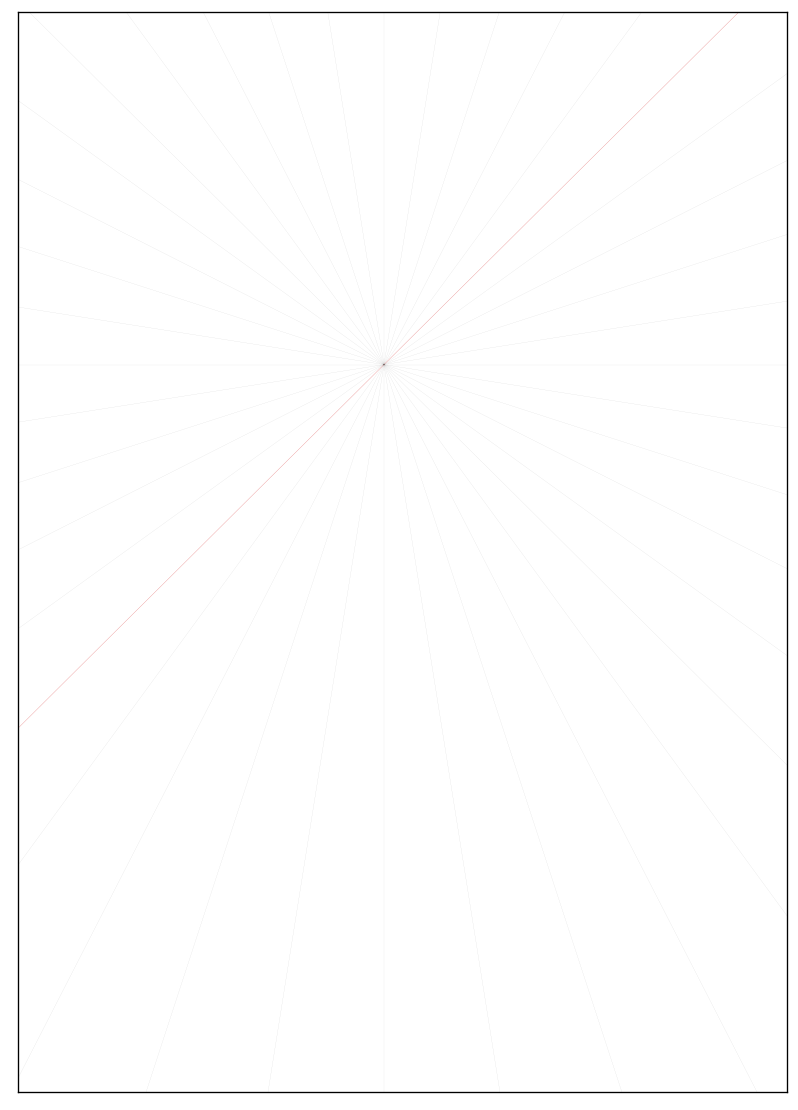

In [5]:
one_vanish_point((10, 20), 'a4', 'outputs/line_plot1', num_lines=40, horizon_line=45)

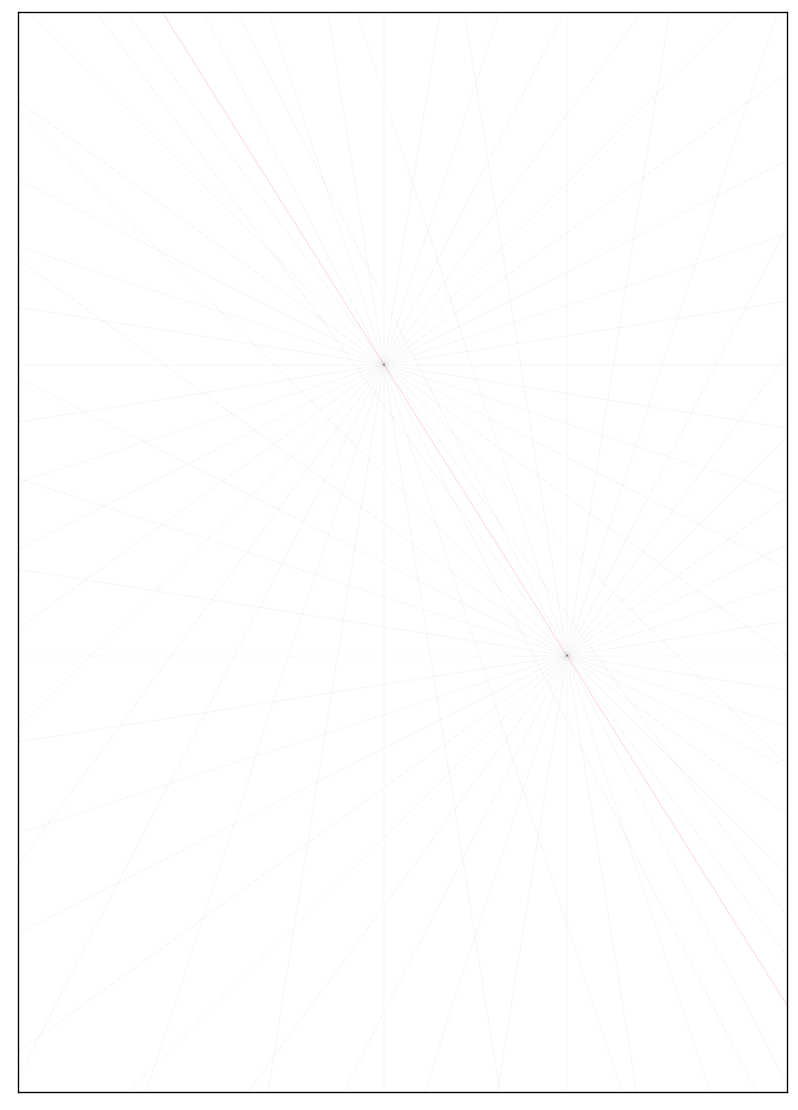

In [293]:
two_vanish_point((10, 20), (15, 12), (21, 29.7), 'outputs/line_plot2', num_lines=40)

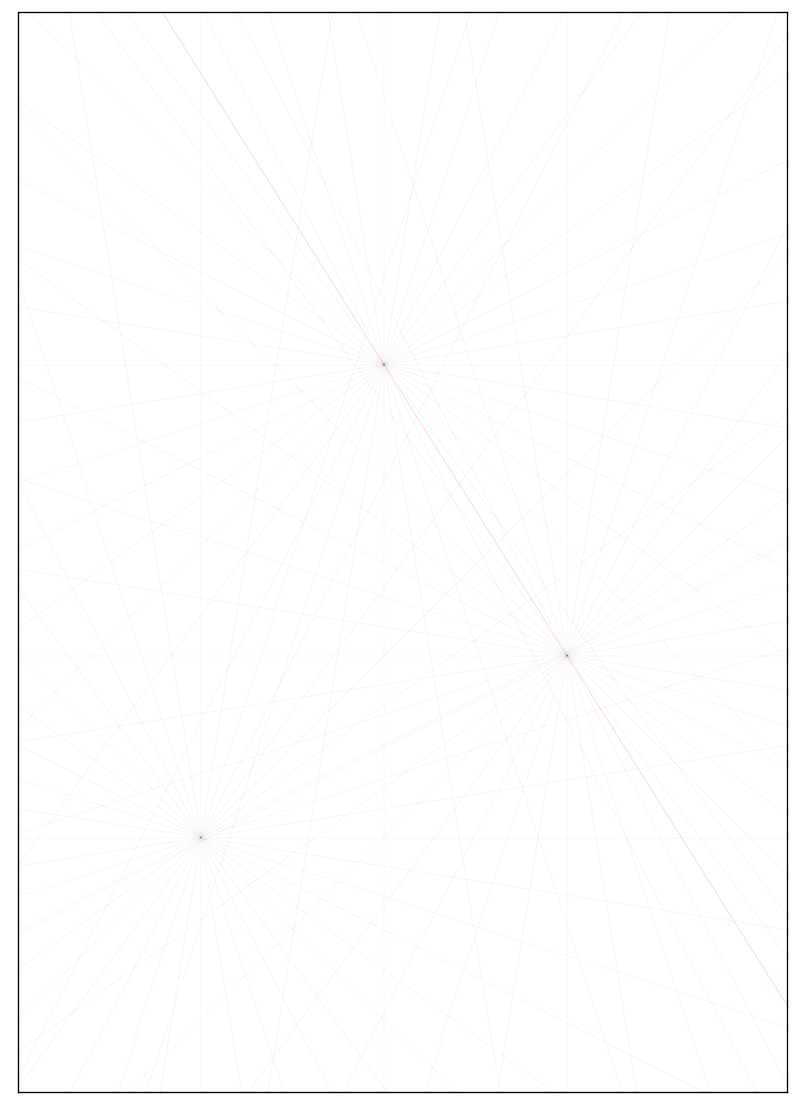

In [294]:
three_vanish_point((10, 20), (15, 12), (5, 7), (21, 29.7), 'outputs/line_plot3', num_lines=40)